In [2]:
#JSFB - Stanford Station
#JSCB - Stevens Creek Station
#JJR - Near Los Altos Woods
#JSJ - Near Cupertino and Los Altos

from obspy import read
import obspy.imaging
import time
from obspy.core.utcdatetime import UTCDateTime
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy.signal import filter
from scipy import signal

#First get current UTC year and day as a string to figure out the part of the link tothe miniSeedStream
today = UTCDateTime.now().utctimetuple()
yearAsString = str(today[0])
dayOfYearAsNum = "{0:0=3d}".format(today[7]) #formats day of year to 3 digits...
dayOfYearAsString = str(dayOfYearAsNum).zfill(3)

#Append First and Second String to create link to JSFB Station
JSFB_url = "http://service.ncedc.org/DART/NC/JSFB.NC/EHZ..D/JSFB.NC.EHZ..D." + yearAsString + "." + dayOfYearAsString
print(JSFB_url)

http://service.ncedc.org/DART/NC/JSFB.NC/EHZ..D/JSFB.NC.EHZ..D.2019.087


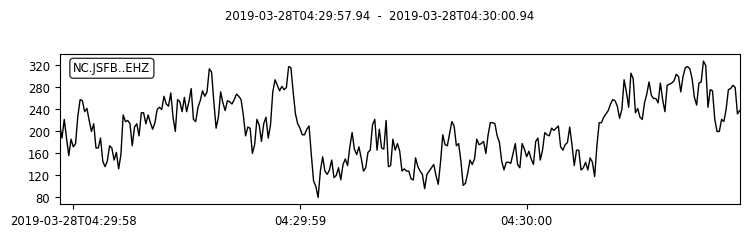

1 Trace(s) in Stream:
NC.JSFB..EHZ | 2019-03-28T04:29:57.940000Z - 2019-03-28T04:30:00.940000Z | 100.0 Hz, 301 samples
NC.JSFB..EHZ | 2019-03-28T04:29:57.940000Z - 2019-03-28T04:30:00.940000Z | 100.0 Hz, 301 samples


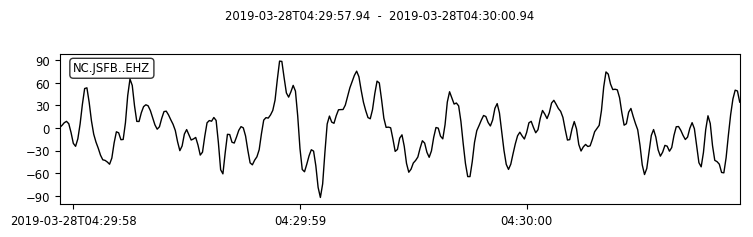

In [6]:
#Read MiniSeed File from JSFB Station EHZ Channel
stream = read(JSFB_url)
param_endtime = UTCDateTime().__sub__(14)
param_starttime = UTCDateTime().__sub__(17) # current time minus 12 seconds... was 17
stream.trim(param_starttime, param_endtime)
stream.plot()

print(stream) # This prints traces in the Stream... There's only 1 trace
trace = stream[0] # The only 1 trace. The sampling rate is already 100 Hz. Proof: print(trace.stats.sampling_rate)
#print(trace.data)

# Preprocessing: All data are down-sampled to 100 Hz, detrended, and filtered with a causal Butterworth filter
# between 1-20 Hz. We only use the vertical component of the sensor on which the analyst picked
# the arrival times.

# Creates a copy of the trace to filter
trace_filter = trace.copy()

#trace_filter.decimate(factor=16, strict_length=False)
print(trace_filter)
trace_filter.detrend('linear')
trace_filter.filter('bandpass', freqmin=1, freqmax=20, corners=4, zerophase=False) 
trace_filter.plot()

